In [ ]:
##### import scipy 
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# for plotting graphs
df=pd.read_csv("parameter.csv")

fig=plt.figure(figsize=(12,12))
rect_1=[0,0,.5,.5]
slope, intercept, r, p, stderr = scipy.stats.linregress(df['Final v SU'], df['Final v re'])
mse = mean_squared_error(df['Final v SU'], df['Final v re'])
line="Fitted line"

rect_1=[0,0,.5,.5]
ax1=fig.add_axes(rect_1,facecolor=(1,1,1))
ax1.plot(df['Final v SU'], df['Final v re'], linewidth=0, marker='o',color="red", label='Data',markersize=7)
ax1.plot([df['Final v SU'].min(),df['Final v SU'].max()], intercept + slope *np.array([df['Final v SU'].min(),df['Final v SU'].max()]),"-g",label=line)
ax1.set_xlabel('Survey',fontsize=22)
ax1.set_ylabel('Official',fontsize=22)
#plt.grid()
#plt.legend(loc=2)
#ax1.legend(facecolor='white',loc=2,fontsize=22)
#plt.title(line1)
#plt.text(0.82, 0.65, f'a={slope:.3f}, b={intercept:.3f}', fontsize=16, color='k')
#plt.text(0.82, 0.6, f'MSE={mse:.3f}, r={r:.2f}', fontsize=16, color='k')
plt.ylim(0.5,1.03)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.title("(a)",fontsize=23)
ax1.legend(facecolor='white',loc=2,fontsize=22)

rect_1=[.7,0,.5,.5]
ax1=fig.add_axes(rect_1,facecolor=(1,1,1))
mselist=[]
for state in list(df["State"]):
    dff=pd.read_csv(f'/Users/javadmohamadichamgavi/Desktop/Projects/Under process/the survay for covid and openioin of people toward vaccination, Mathematical modeling/data for paper/1/simple/realsurvay-model/all realworddata/{state}.csv')
    dff2=pd.read_csv(f"/Users/javadmohamadichamgavi/Desktop/Projects/Under process/the survay for covid and openioin of people toward vaccination, Mathematical modeling/data for paper/1/simple/data/data/aggrigate data/weekly/{state}.csv")
    mse=mean_squared_error(dff["people_vaccinated"]/100, dff2['Vaccinated'])
    mselist.append(mse)
sns.boxplot(
    y=mselist, 
    width=0.3, 
    boxprops=dict(facecolor='skyblue', edgecolor='black', linewidth=1.5),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color='gray', markersize=7, alpha=0.6)
)

# Add labels and title with a stylish font
plt.ylabel("Mean Squared Error", fontsize=22)
plt.title("(b)",fontsize=23)

# Improve aesthetics
plt.xticks([],fontsize=21)
plt.yticks(fontsize=21)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("MSE_Pearson_correlation.jpg", bbox_inches='tight', dpi=500)

0
1
2
3


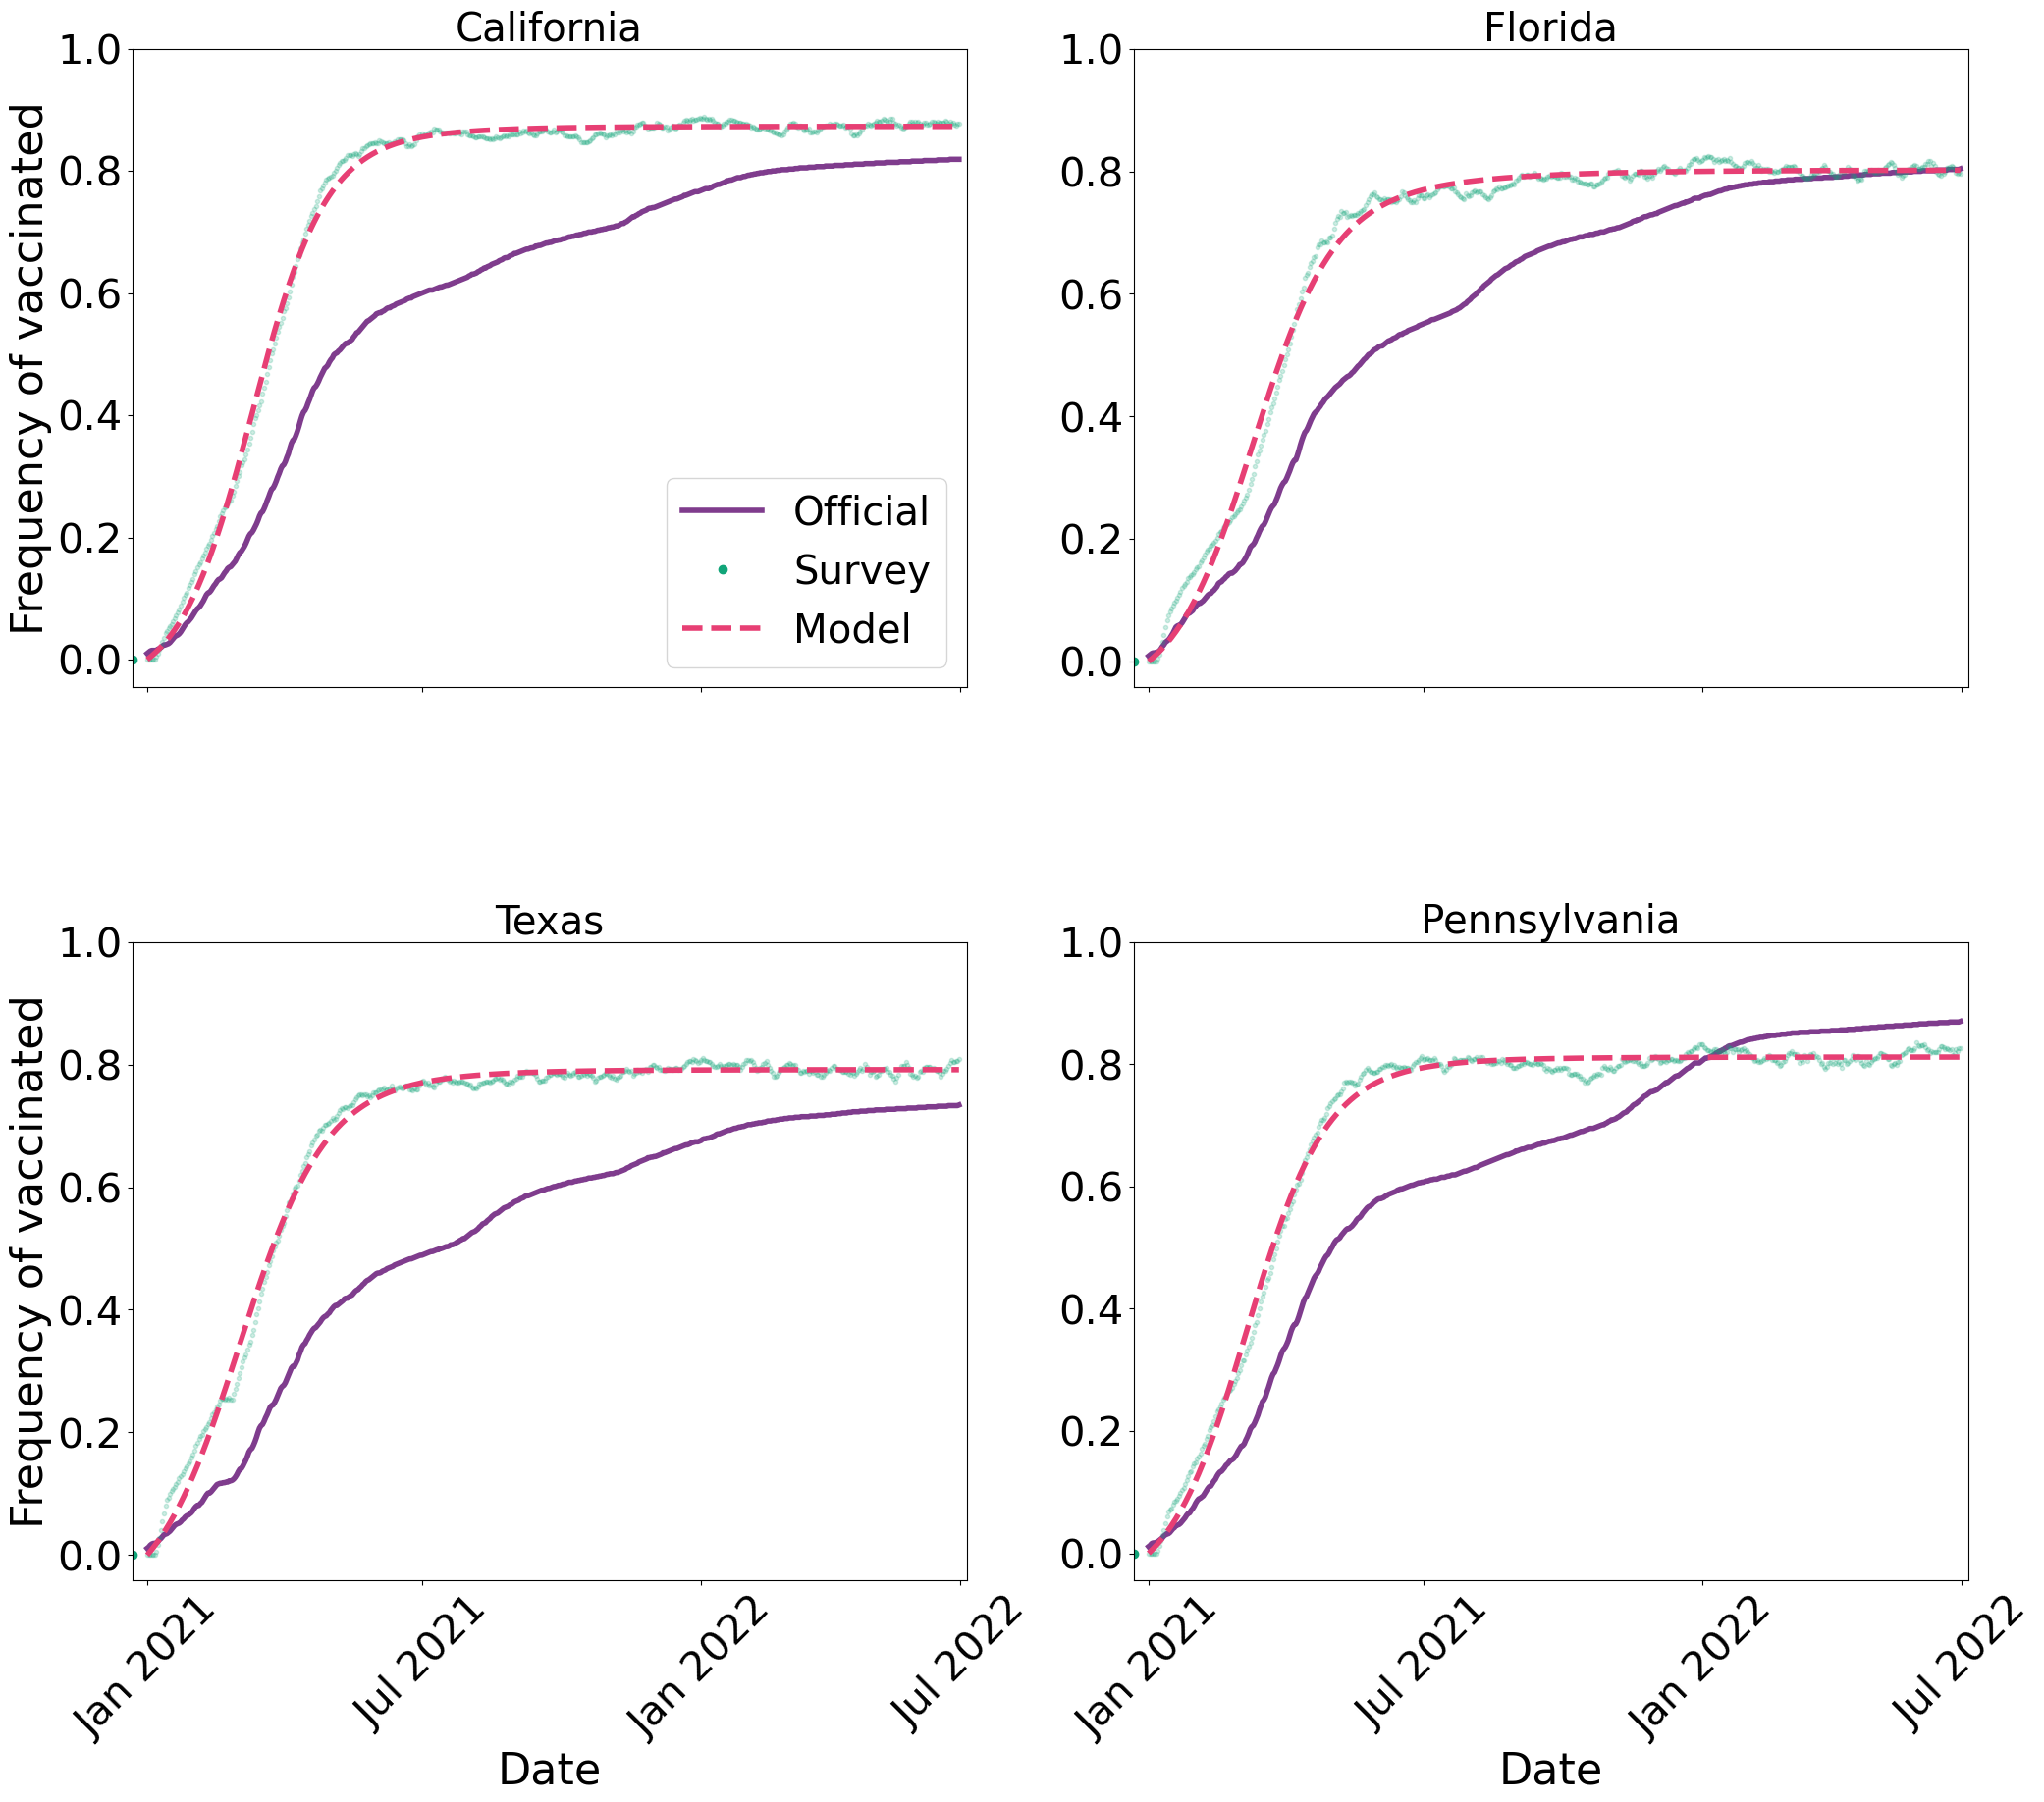

In [16]:
#plot for some especefic state time series of official, survey and model data

COLOR_SCALE = [
    "#7F3C8D", # Texas
    "#11A579", # California
    "#3969AC", # Florida
    "#E73F74", # New York
    "#80BA5A", # Georgia
    "#E68310", # Ohio
    "#7f7f7f"  # Pennsylvania
]
lll=4
fig=plt.figure(figsize=(17,13))
statelist2=["California","Florida","Texas","Pennsylvania" ]
i=0
time=np.arange(0,536,1)
for idx,state in enumerate(statelist2):
    print(idx)
    if idx==0:
        rect_1=[0,0,.5,.5]
    if idx==1:
        rect_1=[0.6,0,.5,.5]
    if idx==2:
        rect_1=[0,-.7,.5,.5]
    if idx==3:
        rect_1=[0.6,-.7,.5,.5]
    ax1=fig.add_axes(rect_1,facecolor=(1,1,1))
    
    tit=f"real data vaccine/{state}.csv" #location of official data
    data=pd.read_csv(tit)
    x=data["Ppeople_vaccinated"]
    ax1.plot(time,x[14:550]/100,"-",color=COLOR_SCALE[0],linewidth=lll,label="Official")
    
    tit=f"weekly/{state}.csv" #location of survey data
    data2=pd.read_csv(tit)
    x=data2["Vaccinated"].to_numpy()
    ax1.plot(time,x,".",color=COLOR_SCALE[1],linewidth=lll,alpha=0.2)
    ax1.plot([-10],0,"o",color=COLOR_SCALE[1],linewidth=lll+5,label="Survey",alpha=1)
    
    tit=f"model/{state}.txt"
    x=np.loadtxt(tit)
    ax1.plot(time,x[2,:],"--",color=COLOR_SCALE[3],linewidth=lll,label="Model")
    if idx==0:
        plt.legend(fontsize=29,loc=4)
    

    
    labels=["0.0","0.2","0.4","0.6","0.8","1.0"]
    plt.yticks([0,.2,.4,.6,.8,1], labels,fontsize=30 )
    plt.xlim(-10,540)
    #plt.grid(alpha=0.6)
    plt.title(state,fontsize=29)
    if idx==0:
        plt.ylabel("Frequency of vaccinated",fontsize=32)
        labels=["","","",""]
        plt.xticks([0,181,365,536], labels,fontsize=30,rotation=45 )
    if idx==1:
        labels=["","","",""]
        plt.xticks([0,181,365,536], labels,fontsize=30,rotation=45 )
    if idx==2:
        plt.ylabel("Frequency of vaccinated",fontsize=32)
        plt.xlabel("Date",fontsize=32)
        labels=["Jan 2021","Jul 2021","Jan 2022","Jul 2022"]
        plt.xticks([0,181,365,536], labels,fontsize=30,rotation=45 )
    if idx==3:
        plt.xlabel("Date",fontsize=32)
        labels=["Jan 2021","Jul 2021","Jan 2022","Jul 2022"]
        plt.xticks([0,181,365,536], labels,fontsize=30,rotation=45 )
plt.savefig("VAR_Survey_Official.jpg", bbox_inches='tight', dpi=500)